#AI & Education: Impact Analysis of Student AI Usage

## What data do you have?

The dataset we are working on in this mini-project is a class survey collecting responses from CS 105 & CS 111 at the University of California Riverside. The relevant data derived from the dataset relates to academics, study habits, AI / cheating perceptions, and lifestyle / well-being. The dataset provides insights into academic behavior, technology adoption, and the influence of AI on academic performance, which can be analyzed to understand trends in student populations.


## What would you like to know?

Our object is to analyze the potential impact of AI usage on academic performance considering factors such as stress levels, academic involvement, and student subpopulations. Specifically, we want to consider the following:

1. If the use of AI tools have a direct correlation to stress. Students may either feel more supported or more dependent on AI, impacting their stress levels.

2. If there is a correlation between a student's class standing and challenges faced using AI

3. If the use of AI tools has a direct impact on student involvement and academic success.

# Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
from collections import Counter
%matplotlib inline
from scipy.stats import pearsonr

survey_df = pd.read_csv('survey.csv')
full_df = survey_df.copy()

# survey_df = survey_df.rename(columns = {'': ''})
# Rename columns
survey_df = survey_df.rename(columns = {'What class are you filling out this survey for? Check all that apply.': 'Course'})
survey_df = survey_df.rename(columns = {'What is your current class standing?': 'Class Standing'})
survey_df = survey_df.rename(columns = {'Are you a transfer student?': 'Transfer'})
survey_df = survey_df.rename(columns = {'What is your major/minor? (If your major is not listed, please write it in "Other..")': 'Major/Minor'})
survey_df = survey_df.rename(columns = {'What is your current cumulative GPA?': 'GPA'})
survey_df = survey_df.rename(columns = {'What is your age? Answer with a number only.': 'Age'})
survey_df = survey_df.rename(columns = {'What is your ethnicity?': 'Ethnicity'})
survey_df = survey_df.rename(columns = {'What gender do you identify as?': 'Gender'})
survey_df = survey_df.rename(columns = {'Which AI tool(s) do you primarily use? Check all that apply.': 'AI Tools'})
survey_df = survey_df.rename(columns = {'Have you ever paid for an AI subscription? If so, what was your reasoning? ': 'Paid for AI Subscriptions'})
survey_df = survey_df.rename(columns = {'What type of tasks do you normally use AI to complete? Check all that apply.': 'Tasks you use AI for'})
survey_df = survey_df.rename(columns = {'What challenges have you faced when using AI? Check all that apply.': 'AI Challenges'})
survey_df = survey_df.rename(columns = {'How stressed are you when it comes to due dates for take-home work (homework assignments, projects, etc)?': 'Stress Take-home work'})
survey_df = survey_df.rename(columns = {'How stressed are you when it comes to in-class tests (quizzes, midterms, finals, etc)?': 'Stress Tests'})
survey_df = survey_df.rename(columns = {'When it comes to preparing for tests or working on assignments, which applies to you the most in terms of procrastination?': 'Preparation/Procrastination'})
survey_df = survey_df.rename(columns = {'How many clubs/organizations are you involved in?': 'Number of Clubs'})
survey_df = survey_df.rename(columns = {'How many hours per week do you spend attending social or extracurricular activities (work, clubs, research, sports, etc.)?': 'Time Spent on Extracurricular Activities'})
survey_df = survey_df.rename(columns = {'Answer the following questions regarding your thoughts on cheating. [Using AI like ChatGPT to help debug is okay.]': 'Using AI like ChatGPT to help debug is okay'})
survey_df = survey_df.rename(columns = {'Answer the following questions regarding your thoughts on cheating. [Using code written by AI like ChatGPT is okay as long as I make some changes.]': 'Using code written by AI like ChatGPT is okay as long as I make some changes'})
survey_df = survey_df.rename(columns = {'How many units are you registered for this quarter? Answer with a number only.': 'Registered Units'})
survey_df = survey_df.rename(columns = {'How often do you feel anxious when working on programming assignments?': 'Anxiety during Programming Assignments'})
survey_df = survey_df.rename(columns = {'Answer the following questions regarding your thoughts on cheating. [Using AI like ChatGPT should not be considered cheating because that is what happens in industry.]': 'Using AI like ChatGPT should not be considered cheating because that is what happens in industry'})

# Columns we possibly do not need
survey_df = survey_df.drop(survey_df.columns[5:13], axis=1)
survey_df = survey_df.drop('What is your height (in inches)? Answer with a number only. If you prefer not to say, type "N/A."', axis=1)
survey_df = survey_df.drop(survey_df.columns[9:49], axis=1)
survey_df = survey_df.drop(survey_df.columns[12:31], axis=1)
survey_df = survey_df.drop(survey_df.columns[13:39], axis=1)
survey_df = survey_df.drop(survey_df.columns[17:23], axis=1)
survey_df = survey_df.drop(survey_df.columns[23:89], axis=1)

survey_df['Uses AI Tools'] = survey_df['AI Tools'].apply(lambda x: 'No' if isinstance(x, str) and x.strip().lower() == 'none, i do not use ai tools' else 'Yes')
# Convert AI usage to numerical (Yes=1, No=0)
survey_df["AI Tool Usage (Numeric)"] = survey_df["Uses AI Tools"].map({"Yes": 1, "No": 0})

survey_df

,Timestamp,Course,Class Standing,Transfer,Major/Minor,GPA,Age,Ethnicity,Gender,Using AI like ChatGPT should not be considered cheating because that is what happens in industry,...,Preparation/Procrastination,Stress Tests,AI Tools,Paid for AI Subscriptions,Tasks you use AI for,AI Challenges,Number of Clubs,Time Spent on Extracurricular Activities,Uses AI Tools,AI Tool Usage (Numeric)
0,1/29/2025 22:16:38,CS105,Junior,Yes,CS major,3.67 – 4.0,22.0,Asian,Male,Slightly Disagree,...,"I don't start right away, but I give myself am...",Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Help with studying,Misinformation/incorrect responses,1,0 - 5 hours,Yes,1
1,1/29/2025 22:20:05,CS105,Junior,No,Data Science major,3.0 – 3.33,20.0,Asian,Female,Slightly Disagree,...,"I don't start right away, but I give myself am...",Often stressed,ChatGPT,"No, but I would consider it if I needed it in ...","Help with studying, Error finding (spelling, d...","Misinformation/incorrect responses, Poor perfo...",2,11 - 15 hours,Yes,1
2,1/29/2025 22:20:05,CS111,Junior,No,CS major,3.67 – 4.0,19.0,Asian,Male,Strongly Agree,...,I always get started as soon as possible,Often stressed,ChatGPT,"No, I’ve never paid for an AI subscription bec...","Help with studying, Personal use, Summarizing ...","Misinformation/incorrect responses, Ethical co...",1,11 - 15 hours,Yes,1
3,1/29/2025 22:20:31,"CS105, CS111",Senior,No,CS or DS minor,3.33 – 3.67,22.0,Asian,Female,Slightly Agree,...,I give myself just about enough time to comple...,Often stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...","Error finding (spelling, debugging, etc)",Poor performance (i.e. AI is unable to help),1,11 - 15 hours,Yes,1
4,1/29/2025 22:27:33,CS111,Junior,No,CS major,2.67 – 3.0,20.0,Hispanic or Latino,Male,Slightly Disagree,...,I give myself just about enough time to comple...,Sometimes stressed,ChatGPT,"No, I’ve never paid for an AI subscription bec...","Assignments, Error finding (spelling, debuggin...","Misinformation/incorrect responses, Poor perfo...",0,0 - 5 hours,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2/4/2025 0:48:37,CS010C,Sophomore,No,CS major,3.67 – 4.0,20.0,Asian,Male,Slightly Disagree,...,I give myself just about enough time to comple...,Not at all stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Assignments,Ethical concerns,0,0 - 5 hours,Yes,1
241,2/4/2025 1:23:25,CS010C,Freshman,No,Data Science major,3.67 – 4.0,18.0,Asian,Male,Strong Disagree,...,I usually start later than I should,Often stressed,ChatGPT,"Yes, out of curiosity or to try out premium op...","Help with studying, Error finding (spelling, d...","Misinformation/incorrect responses, Personal o...",2,6 - 10 hours,Yes,1
242,2/4/2025 4:47:21,CS010A,Freshman,No,CEN or EE major,3.33 – 3.67,18.0,Hispanic or Latino,Male,Slightly Disagree,...,I usually start later than I should,Rarely stressed,"ChatGPT, Gemini","No, I don’t see the value in paying for AI ser...","Help with studying, Personal use, Research","Misinformation/incorrect responses, Personal o...",1,11 - 15 hours,Yes,1
243,2/4/2025 8:49:53,CS010A,Freshman,No,Bioengineer,2.33 – 2.67,19.0,Hispanic or Latino,Male,Strong Disagree,...,I give myself just about enough time to comple...,Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...","Help with studying, Personal use, Error findin...","Misinformation/incorrect responses, Ethical co...",0,11 - 15 hours,Yes,1


In [ ]:
df = survey_df.copy()

df['Uses AI Tools'] = df['AI Tools'].apply(lambda x: 'No' if isinstance(x, str) and x.strip().lower() == 'none, i do not use ai tools' else 'Yes')

df["AI Tool Usage (Numeric)"] = df["Uses AI Tools"].map({"Yes": 1, "No": 0})


df['AI Tools'] = df['AI Tools'].str.split(', ')
df['Tasks you use AI for'] = df['Tasks you use AI for'].str.split(', ')
df['AI Challenges'] = df['AI Challenges'].str.split(', ')


exploded_df = df.explode('AI Tools', ignore_index=True)
exploded_df = exploded_df.explode('Tasks you use AI for', ignore_index=True)
exploded_df = exploded_df.explode('AI Challenges', ignore_index=True)

unwanted_responses = ["I do not use AI tools", "", "claudia", "google ai when you search a question and the little ai box pops up at the top of the results", "AI overview from google", "claude", "deepseek", "DeepSeek", "DeepSeek for code reviews. Has given me very impressive results. It is rather new.", "Trying to create a good prompt to translate concepts I would otherwise ask a human being using facial expressions", "pauses", "general understanding of each other", "things that a text prompt can't portray", "I do not use AI to get answers but in order to get summaries for what I am learning. Sometimes another perspective helps me and I haven't run into any problems because I don't use it that much.", "I do not use AI tools", "etc.)", "N/A", "etc)", "debugging", "outline problems", "nan", "Cooking recipes", " ", "", "I often let AI check and compare or explain how to get that", "Asking general questions on google", "generates AI responses when I'm not intending to use it.", "Artbreeder - Entertainment and Art", "I tell it to pretend to be a fish. This is humorous to me.", "Practice exercises"]

exploded_df = exploded_df[~exploded_df['AI Tools'].isin(unwanted_responses)]
exploded_df = exploded_df[~exploded_df['Tasks you use AI for'].isin(unwanted_responses)]
exploded_df = exploded_df[~exploded_df['AI Challenges'].isin(unwanted_responses)]


df = exploded_df
df



,Timestamp,Course,Class Standing,Transfer,Major/Minor,GPA,Age,Ethnicity,Gender,Using AI like ChatGPT should not be considered cheating because that is what happens in industry,...,Preparation/Procrastination,Stress Tests,AI Tools,Paid for AI Subscriptions,Tasks you use AI for,AI Challenges,Number of Clubs,Time Spent on Extracurricular Activities,Uses AI Tools,AI Tool Usage (Numeric)
0,1/29/2025 22:16:38,CS105,Junior,Yes,CS major,3.67 – 4.0,22.0,Asian,Male,Slightly Disagree,...,"I don't start right away, but I give myself am...",Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Help with studying,Misinformation/incorrect responses,1,0 - 5 hours,Yes,1
1,1/29/2025 22:20:05,CS105,Junior,No,Data Science major,3.0 – 3.33,20.0,Asian,Female,Slightly Disagree,...,"I don't start right away, but I give myself am...",Often stressed,ChatGPT,"No, but I would consider it if I needed it in ...",Help with studying,Misinformation/incorrect responses,2,11 - 15 hours,Yes,1
2,1/29/2025 22:20:05,CS105,Junior,No,Data Science major,3.0 – 3.33,20.0,Asian,Female,Slightly Disagree,...,"I don't start right away, but I give myself am...",Often stressed,ChatGPT,"No, but I would consider it if I needed it in ...",Help with studying,Poor performance (i.e. AI is unable to help),2,11 - 15 hours,Yes,1
3,1/29/2025 22:20:05,CS105,Junior,No,Data Science major,3.0 – 3.33,20.0,Asian,Female,Slightly Disagree,...,"I don't start right away, but I give myself am...",Often stressed,ChatGPT,"No, but I would consider it if I needed it in ...",Error finding (spelling,Misinformation/incorrect responses,2,11 - 15 hours,Yes,1
4,1/29/2025 22:20:05,CS105,Junior,No,Data Science major,3.0 – 3.33,20.0,Asian,Female,Slightly Disagree,...,"I don't start right away, but I give myself am...",Often stressed,ChatGPT,"No, but I would consider it if I needed it in ...",Error finding (spelling,Poor performance (i.e. AI is unable to help),2,11 - 15 hours,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,2/4/2025 8:49:53,CS010A,Freshman,No,Bioengineer,2.33 – 2.67,19.0,Hispanic or Latino,Male,Strong Disagree,...,I give myself just about enough time to comple...,Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Research,Misinformation/incorrect responses,0,11 - 15 hours,Yes,1
3594,2/4/2025 8:49:53,CS010A,Freshman,No,Bioengineer,2.33 – 2.67,19.0,Hispanic or Latino,Male,Strong Disagree,...,I give myself just about enough time to comple...,Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Research,Ethical concerns,0,11 - 15 hours,Yes,1
3595,2/4/2025 8:49:53,CS010A,Freshman,No,Bioengineer,2.33 – 2.67,19.0,Hispanic or Latino,Male,Strong Disagree,...,I give myself just about enough time to comple...,Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Summarizing an assignment (break down concepts,Misinformation/incorrect responses,0,11 - 15 hours,Yes,1
3596,2/4/2025 8:49:53,CS010A,Freshman,No,Bioengineer,2.33 – 2.67,19.0,Hispanic or Latino,Male,Strong Disagree,...,I give myself just about enough time to comple...,Always stressed,ChatGPT,"No, I don’t see the value in paying for AI ser...",Summarizing an assignment (break down concepts,Ethical concerns,0,11 - 15 hours,Yes,1


In [ ]:


full_df = full_df.rename(columns = {'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Software Engineering]': 'Software_Engineering',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Web Development]': 'Web_Development',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Data Science]': 'Data_Science',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Computer security and cryptography]': 'Cyber_Security',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Databases]': 'Databases',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Algorithms]': 'Algorithms',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Game Development]': 'Game_Development',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Networks]': 'Networks',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Machine Learning, Data Mining, NLP, AI]': 'Machine_Learning',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Computer Architecture]': 'Computer_Architecture',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Embedded systems]': 'Embedded_Systems',
    'What are your top 3 preferred domains of interest in computer science? For options not chosen, select "Not applicable." [Computer Graphics]': 'Computer_Graphics'})



# Exploratory Data Analysis

In our EDA, we examined the relationships between variables to find potential correlations that align with our 3 hypotheses. To begin, we isolated individual variables and observed their trends. Then exploring our hypoethesis, we identified stress indicators and how they related to the usage of AI tools. We explored the connection between grade levels and the challenges students face, analyzing whether they influence overall AI usage and prefered tools. Finally, we dove into academic success indicators and student involvement, comparing their relationships with AI factors.

Our major method for drafting our hypotheses heavily focused on looking at our graphs made from the EDA. Below are the general graphs we had used, with our major hypotheses that we determined important to our topic of AI and Education.



## Ai vs Class Standing

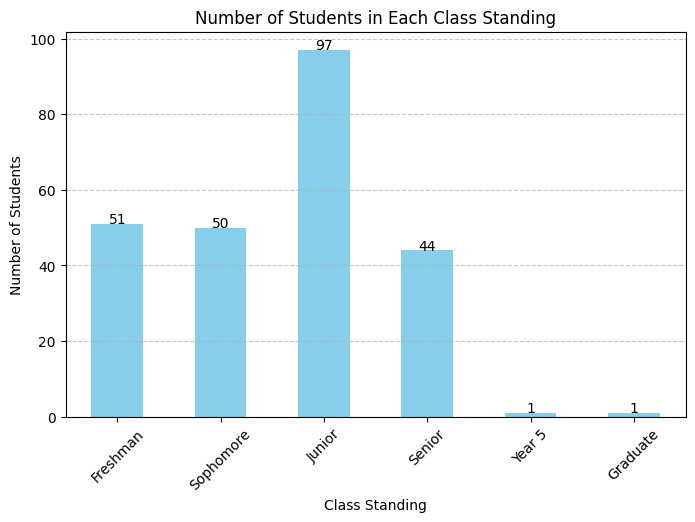

In [ ]:
class_order = ["Freshman", "Sophomore", "Junior", "Senior", "Year 5", "Graduate"]

survey_df['Class Standing'] = pd.Categorical(survey_df['Class Standing'], categories=class_order, ordered=True)

class_counts = survey_df['Class Standing'].value_counts().reindex(class_order)

ax = class_counts.plot(kind='bar', color='skyblue', figsize=(8,5))

plt.xlabel("Class Standing")
plt.ylabel("Number of Students")
plt.title("Number of Students in Each Class Standing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(class_counts):
    ax.text(i, v + 0.1, str(v), ha='center', fontsize=10)

plt.show()

###Observation:
The academic class standing distribution depicted in the bar chart below reveals a large number of juniors across courses. The courses that contributed to this trend were CS111 and CS105 as CS111 is a course commonly taken by sophomores and juniors, and CS105 is primarily enrolled by juniors and seniors since they are higher level courses. There is also a fair distribution of students who are taking the CS010 series, made of pedominantly of freshman and also sophomores.

<Figure size 800x600 with 0 Axes>

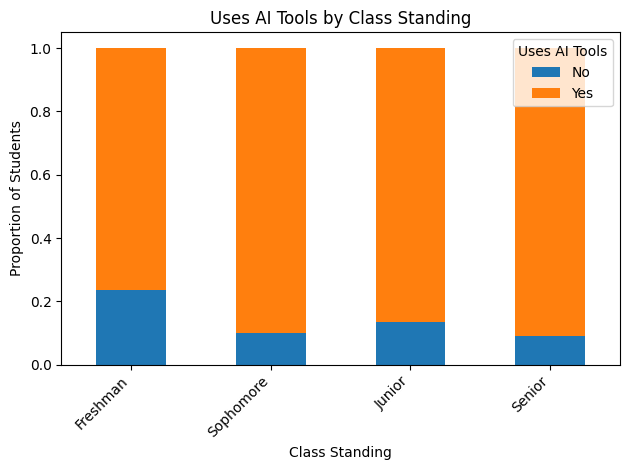

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

uses_df = survey_df.copy()

tool_counts = uses_df['Uses AI Tools'].value_counts()

top_5_tools = tool_counts.nlargest(5).index

top_5_tools_df = uses_df[uses_df['Uses AI Tools'].isin(top_5_tools)]

scaled_data = pd.crosstab(uses_df['Class Standing'], top_5_tools_df['Uses AI Tools'], normalize='index')
scaled_data = scaled_data.drop(['Year 5', 'Graduate'], axis=0, errors='ignore')


plt.figure(figsize=(8, 6))
stacked_bar_plot = scaled_data.plot.bar(stacked=True)
plt.title('Uses AI Tools by Class Standing')
plt.xlabel('Class Standing')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Uses AI Tools')
plt.tight_layout()
plt.show()

In [ ]:
scaled_data

Uses AI Tools,No,Yes
Class Standing,,
Freshman,0.235294,0.764706
Sophomore,0.100000,0.900000
Junior,0.134021,0.865979
Senior,0.090909,0.909091


### Observation

The majority of students in each class standing use AI tools. We see that the proportion of students who use AI tools is pretty consistent across the class standings, with little variation between the grade levels. However, we can still distinguish that Freshman have the lowest AI usage and Seniors have the highest AI usage. This suggests that as students progress in their academic journey, their AI tool usage increases.


<Figure size 1200x800 with 0 Axes>

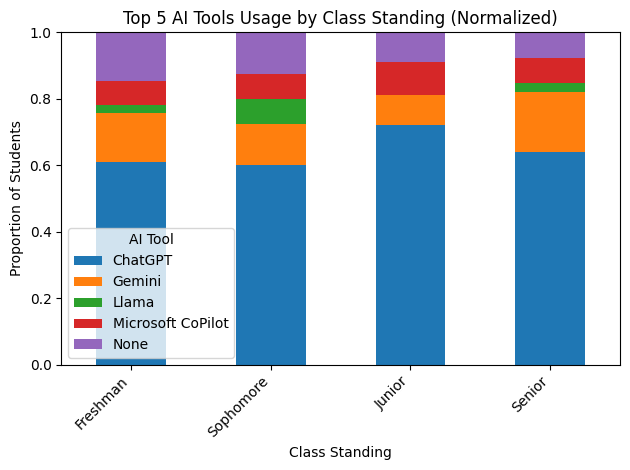

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


tools_list = []
for index, row in survey_df.iterrows():
    tools = row['AI Tools']
    if isinstance(tools, str):
        tools_list.extend(tools.split(', '))

tools_df = pd.DataFrame({'AI Tool': tools_list})

unwanted_responses = ["I do not use AI tools"]

tools_df = tools_df[~tools_df['AI Tool'].isin(unwanted_responses)]

tool_counts = tools_df['AI Tool'].value_counts()

top_5_tools = tool_counts.nlargest(5).index

top_5_tools_df = tools_df[tools_df['AI Tool'].isin(top_5_tools)]

class_standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']

survey_df['Class Standing'] = pd.Categorical(survey_df['Class Standing'], categories=class_standing_order, ordered=True)

total_students = survey_df['Class Standing'].value_counts()

grouped = pd.crosstab(survey_df['Class Standing'], top_5_tools_df['AI Tool'], normalize='index')

plt.figure(figsize=(12, 8))
stacked_bar_plot = grouped.plot(kind='bar', stacked=True)
plt.title('Top 5 AI Tools Usage by Class Standing (Normalized)')
plt.xlabel('Class Standing')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Tool')
plt.ylim((0, 1))
plt.tight_layout()
plt.show()


In [ ]:
grouped

AI Tool,ChatGPT,Gemini,Llama,Microsoft CoPilot,None
Class Standing,,,,,
Freshman,0.609756,0.146341,0.024390,0.073171,0.146341
Sophomore,0.600000,0.125000,0.075000,0.075000,0.125000
Junior,0.722222,0.088889,0.000000,0.100000,0.088889
Senior,0.641026,0.179487,0.025641,0.076923,0.076923


### Observation

From the scaled bar graph of the top 5 AI Tool Usage, we see that ChatGPT is the most popular AI tool across all class standings. This may be due to its accessibility, ease of use, or effectiveness in academic tasks. Juniors having the highest usage for ChatGPT followed by Seniors. The proportion of students who do not use AI tools decreases as Class standing increases. This may indicate that students gradually adopt AI tools as they progress in college.


<Figure size 800x600 with 0 Axes>

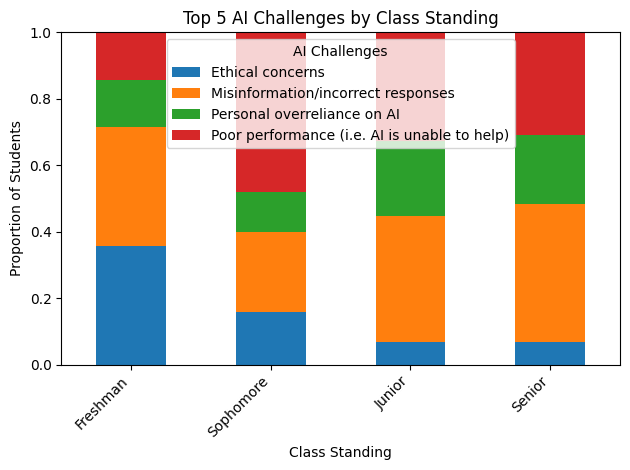

In [ ]:
class_standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']

survey_df['Class Standing'] = pd.Categorical(survey_df['Class Standing'], categories=class_standing_order, ordered=True)

normalized_challenges = pd.crosstab(survey_df['Class Standing'], df['AI Challenges'], normalize='index')

plt.figure(figsize=(8, 6))
normalized_challenges.plot(kind='bar', stacked=True)

plt.title('Top 5 AI Challenges by Class Standing')
plt.xlabel('Class Standing')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Challenges')
plt.ylim((0, 1))

plt.tight_layout()
plt.show()


In [ ]:
normalized_challenges

AI Challenges,Ethical concerns,Misinformation/incorrect responses,Personal overreliance on AI,Poor performance (i.e. AI is unable to help)
Class Standing,,,,
Freshman,0.357143,0.357143,0.142857,0.142857
Sophomore,0.160000,0.240000,0.120000,0.480000
Junior,0.068966,0.379310,0.224138,0.327586
Senior,0.068966,0.413793,0.206897,0.310345


### Observation

Ethical Concerns decline as Class standing increases. Freshmen report the highest level of ethical concerns while Juniors and Seniors report the lowest. This suggests that underclassmen are more cautious or skeptical about AI's ethical implications, while the upperclassmen may have become more comfortable with AI use over time. Misinformation is also major concern across all class standings, suggesting that as students rely on AI, they are considerately aware of its limitations in providing accurate information. There is a dramatic increase from Freshmen to Sophormore over Poor performance. This may be due to the transition into more challenging coursework, which makes students rely more on AI for complex tasks.

<Figure size 1200x800 with 0 Axes>

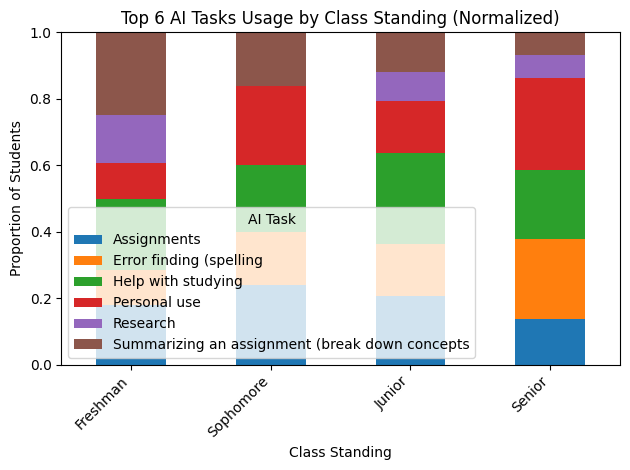

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

task_counts = df['Tasks you use AI for'].value_counts()

top_6_tasks = task_counts.nlargest(6).index

top_6_tasks_df = df[df['Tasks you use AI for'].isin(top_6_tasks)]

class_standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Year 5', 'Graduate']

survey_df['Class Standing'] = pd.Categorical(survey_df['Class Standing'], categories=class_standing_order, ordered=True)

normalized_tasks = pd.crosstab(survey_df['Class Standing'], top_6_tasks_df['Tasks you use AI for'], normalize='index')

plt.figure(figsize=(12, 8))
normalized_tasks.plot(kind='bar', stacked=True)

plt.title('Top 6 AI Tasks Usage by Class Standing (Normalized)')
plt.xlabel('Class Standing')
plt.ylabel('Proportion of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Task')
plt.ylim((0, 1))

plt.tight_layout()
plt.show()


In [ ]:
normalized_tasks

Tasks you use AI for,Assignments,Error finding (spelling,Help with studying,Personal use,Research,Summarizing an assignment (break down concepts
Class Standing,,,,,,
Freshman,0.178571,0.107143,0.214286,0.107143,0.142857,0.250000
Sophomore,0.240000,0.160000,0.200000,0.240000,0.000000,0.160000
Junior,0.206897,0.155172,0.275862,0.155172,0.086207,0.120690
Senior,0.137931,0.241379,0.206897,0.275862,0.068966,0.068966


### Observation
The most common AI tool by far is ChatGPT. About 60% of students in every class standing reported using ChatGPT.

As students get older, they use AI tools less and less for summarizing assignments. It goes from the most common reason for AI usage among freshmen to the least common reason for AI usage among seniors. Throughout class standing, Personal Use and Help With Studying remain in the Top 3 of most common reasons to use AI tools.


### Stress levels based on Class Standing

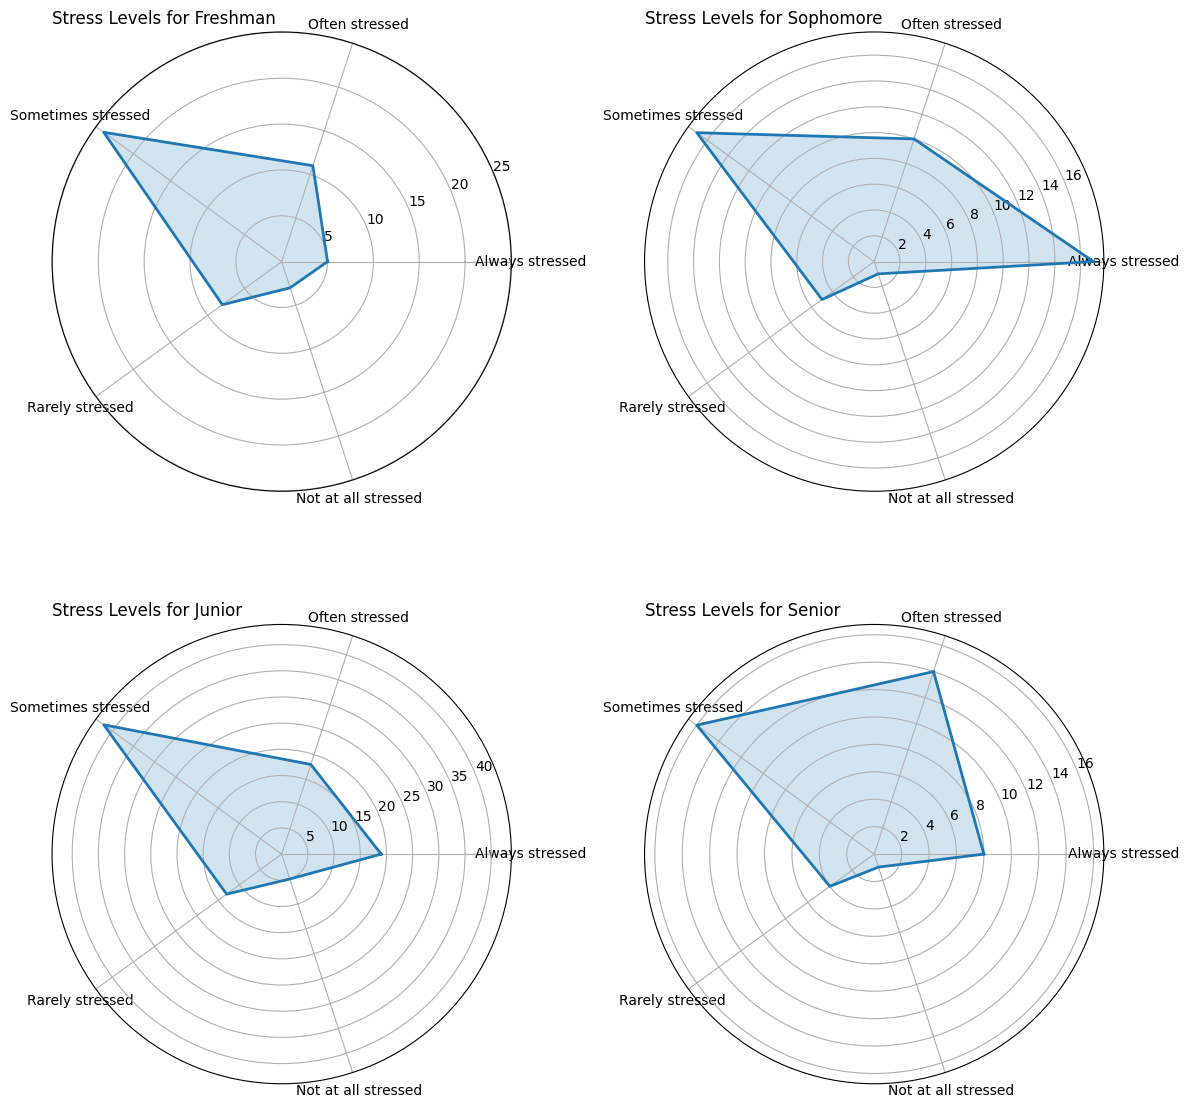

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spider_chart(ax, title, filtered_counts):
    labels = ['Always stressed', 'Often stressed', 'Sometimes stressed', 'Rarely stressed', 'Not at all stressed']
    sizes = [filtered_counts.get(label, 0) for label in labels]

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    sizes += sizes[:1]

    ax.plot(angles, sizes, linewidth=2)
    ax.fill(angles, sizes, alpha=0.2)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(title, loc='left')

class_standings = ['Freshman', 'Sophomore', 'Junior', 'Senior']

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(polar=True))

for i, standing in enumerate(class_standings):
    class_df = survey_df[survey_df['Class Standing'] == standing]
    phrase_counts = class_df['Stress Take-home work'].value_counts()

    phrases_STRESS_HW = ['Always stressed', 'Often stressed', 'Sometimes stressed', 'Rarely stressed', 'Not at all stressed']
    filtered_counts = phrase_counts[phrase_counts.index.isin(phrases_STRESS_HW)]

    ax = axes[i // 2, i % 2]

    plot_spider_chart(ax, f'Stress Levels for {standing}', filtered_counts)

plt.tight_layout()
plt.show()


###Observations:

From the chart we can see that sophomores and seniors reported to be stressed far more than freshman and juniors. This suggests that stress levels may increase as students progress through their academic years since academic workload and responsibilities increase through the years.

## Use of AI vs Stress

<ipython-input-70-821de3484c63>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(survey_df.pivot_table(index='Uses AI Tools', columns='Stress Take-home work', aggfunc='size', fill_value=0),


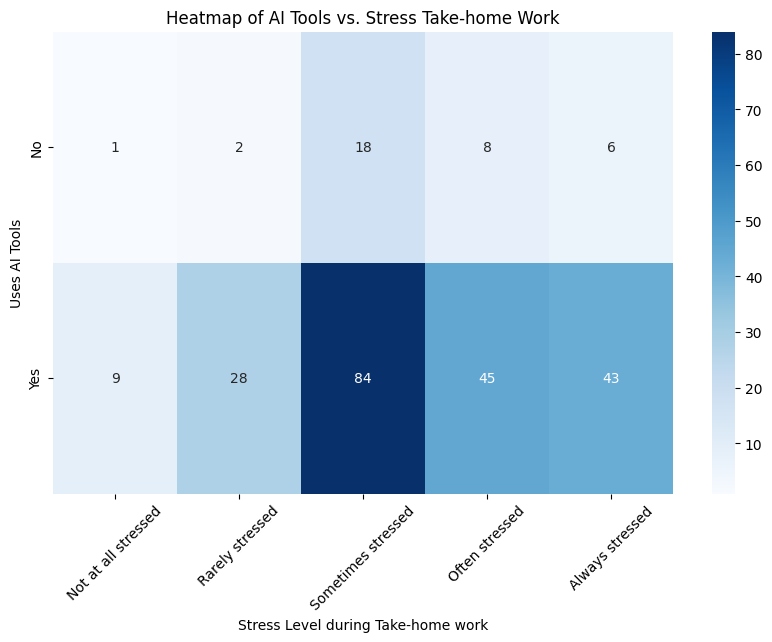

In [ ]:
stress_order = ["Not at all stressed", "Rarely stressed", "Sometimes stressed", "Often stressed", "Always stressed"]

survey_df['Stress Take-home work'] = pd.Categorical(survey_df['Stress Take-home work'], categories=stress_order, ordered=True)


plt.figure(figsize=(10, 6))

sns.heatmap(survey_df.pivot_table(index='Uses AI Tools', columns='Stress Take-home work', aggfunc='size', fill_value=0),
            annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of AI Tools vs. Stress Take-home Work')
plt.xlabel('Stress Level during Take-home work')
plt.ylabel('Uses AI Tools')
plt.xticks(rotation=45)
plt.show()


### Observation:
A large proportion of students who use AI tools are sometimes stressed while doing Take-home work. This may due to their access to AI tools that provide assistance when they work on assignments. The proportion of students who are sometimes or often stressed is greater among students who do not use AI tools than those who do.

<ipython-input-71-63f7469abe17>:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0)


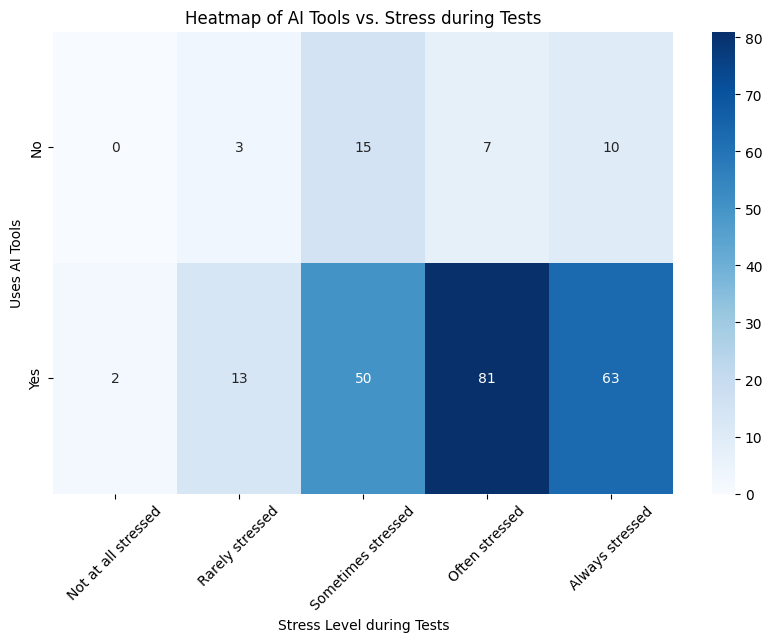

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stress_order = ["Not at all stressed", "Rarely stressed", "Sometimes stressed", "Often stressed", "Always stressed"]

survey_df['Stress Tests'] = pd.Categorical(survey_df['Stress Tests'], categories=stress_order, ordered=True)

plt.figure(figsize=(10, 6))
heatmap_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0)

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

plt.title('Heatmap of AI Tools vs. Stress during Tests')
plt.xlabel('Stress Level during Tests')
plt.ylabel('Uses AI Tools')
plt.xticks(rotation=45)
plt.show()


### Observation

The distribution of students who use AI leans more towards being always stressed during tests. The largest group falls under the "often" stress category. The distribution of students who do not use AI are either sometimes stressed (the largest group) or always stressed (the smallest group). This data suggests that students who use AI tools report higher levels of stress during Tests. This may need to be investigated further to see if there is a correlation between stress and AI tool usage.

<ipython-input-72-b8c10d241c45>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(survey_df.pivot_table(index='AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0),


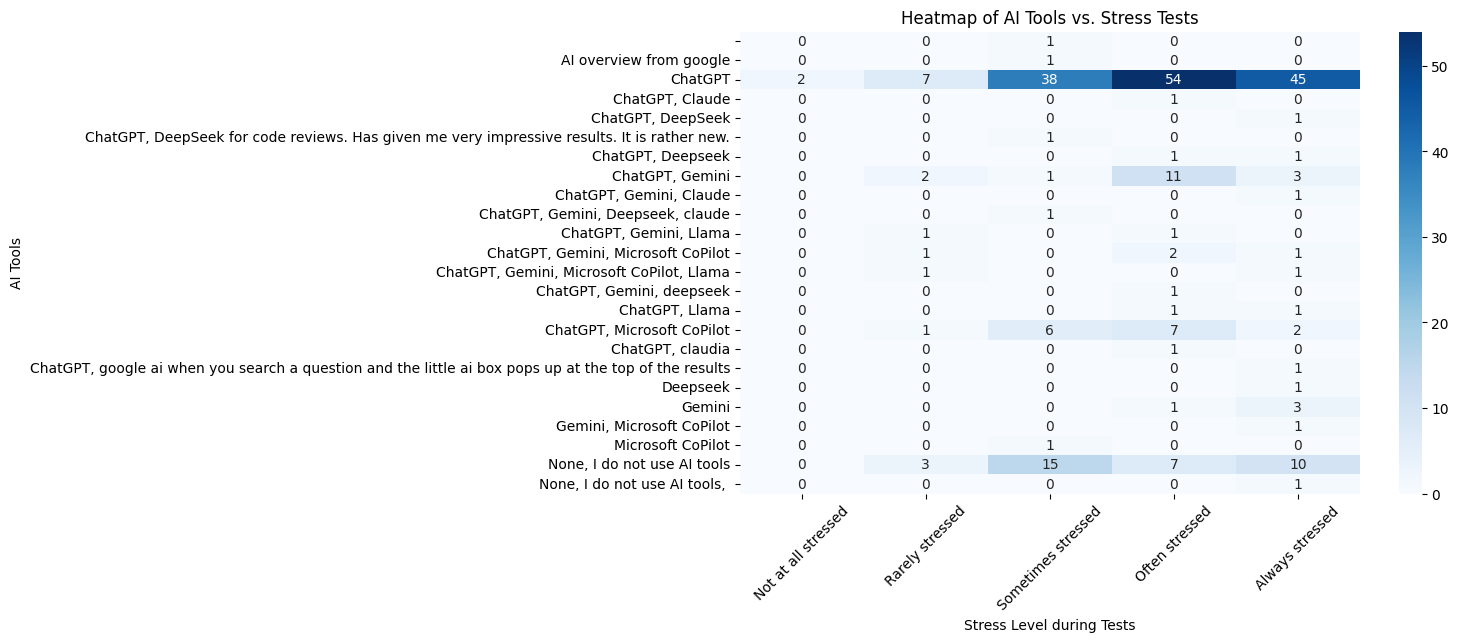

In [ ]:
stress_order = ["Not at all stressed", "Rarely stressed", "Sometimes stressed", "Often stressed", "Always stressed"]

survey_df['Stress Tests'] = pd.Categorical(survey_df['Stress Tests'], categories=stress_order, ordered=True)


plt.figure(figsize=(10, 6))

sns.heatmap(survey_df.pivot_table(index='AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0),
            annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of AI Tools vs. Stress Tests')
plt.xlabel('Stress Level during Tests')
plt.ylabel('AI Tools')
plt.xticks(rotation=45)
plt.show()

A majority of students who use AI tools prefer to use ChatGPT. A large proportion report being "Often" or "Always" stressed. Although the focus of our hypotheses were not in relation to the usage of specific tools, knowing which tools were used more often is beneficial in recognizing patterns of how students manage stress and how they leverage AI for support.

<ipython-input-73-1270a68bc1f9>:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap1_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Take-home work', aggfunc='size', fill_value=0)
<ipython-input-73-1270a68bc1f9>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap2_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0)


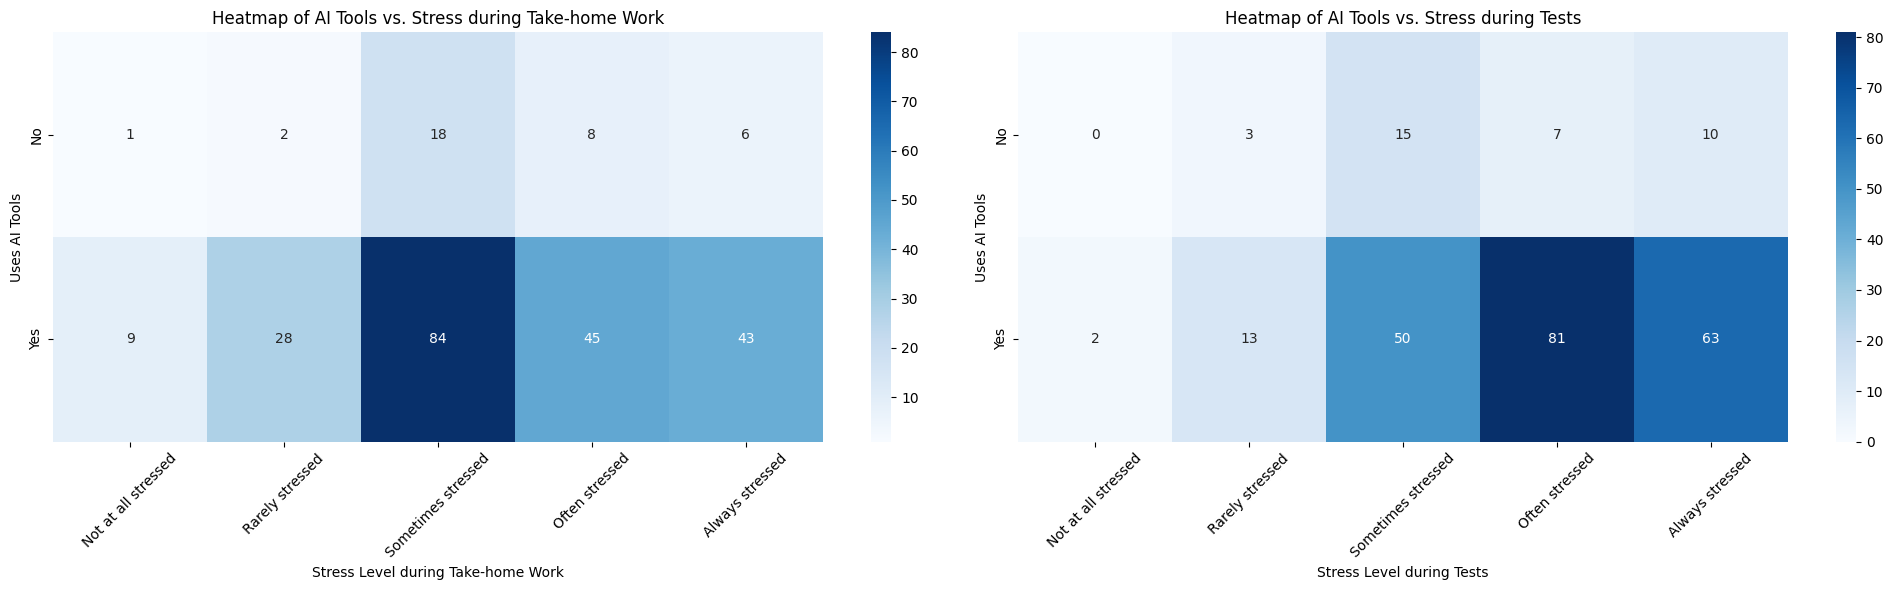

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stress_order = ["Not at all stressed", "Rarely stressed", "Sometimes stressed", "Often stressed", "Always stressed"]

survey_df['Stress Take-home work'] = pd.Categorical(survey_df['Stress Take-home work'], categories=stress_order, ordered=True)
survey_df['Stress Tests'] = pd.Categorical(survey_df['Stress Tests'], categories=stress_order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

heatmap1_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Take-home work', aggfunc='size', fill_value=0)
sns.heatmap(heatmap1_data, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Heatmap of AI Tools vs. Stress during Take-home Work')
axes[0].set_xlabel('Stress Level during Take-home Work')
axes[0].set_ylabel('Uses AI Tools')
axes[0].tick_params(axis='x', rotation=45)

heatmap2_data = survey_df.pivot_table(index='Uses AI Tools', columns='Stress Tests', aggfunc='size', fill_value=0)
sns.heatmap(heatmap2_data, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Heatmap of AI Tools vs. Stress during Tests')
axes[1].set_xlabel('Stress Level during Tests')
axes[1].set_ylabel('Uses AI Tools')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###Observations:
From the heat maps above we can see that there is a fairly similar distribution between stress in students with AI tools and stress in students who do not use AI tools. In the second heat map there is a slight decrease in stress levels for students who don't use AI compared to those who do. With more data we may be able to observe a stronger trend, however for now there does not seem to be much of an indicator that students may use AI to eliviate stress.

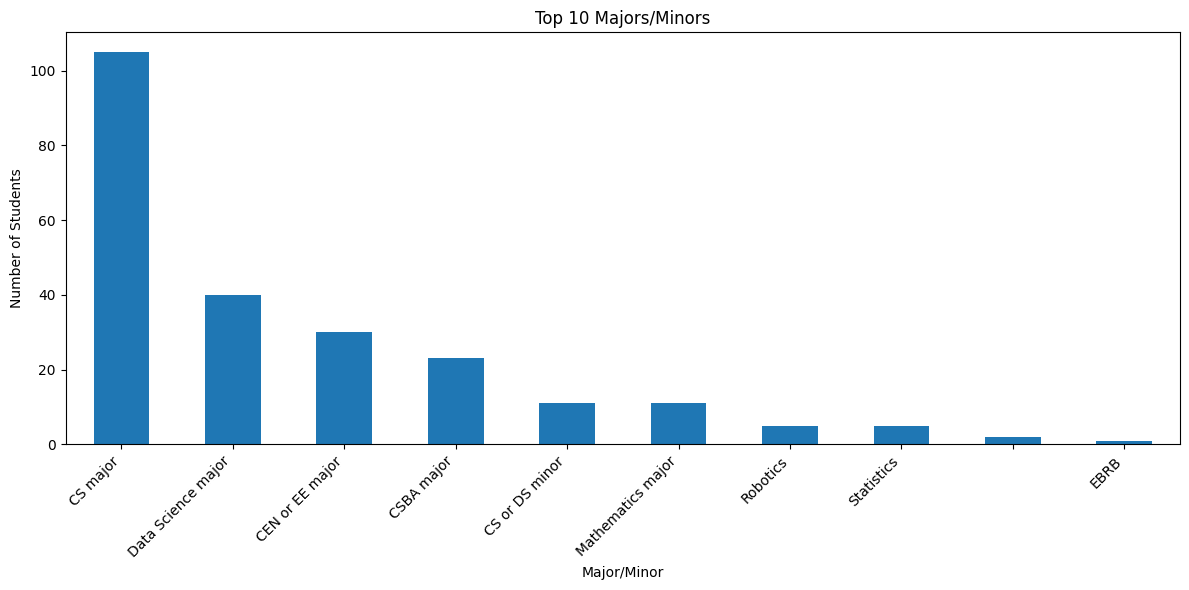

In [ ]:

major_counts = survey_df['Major/Minor'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
major_counts.plot(kind='bar')
plt.title('Top 10 Majors/Minors')
plt.xlabel('Major/Minor')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Observations

The most common major by far is CS. Then Data Science, EE, and CSBA round out the majority of majors. This is important to keep in mind when observing our data. Could it be that students in computer science majors find themselves using AI more predominately because of the difficulty of the major, or being of coding help, or other computer science specific reasons? This data may look different because of this demographic in comparison to maybe a majority of Mathematics or Statistics majors who may not code as often.

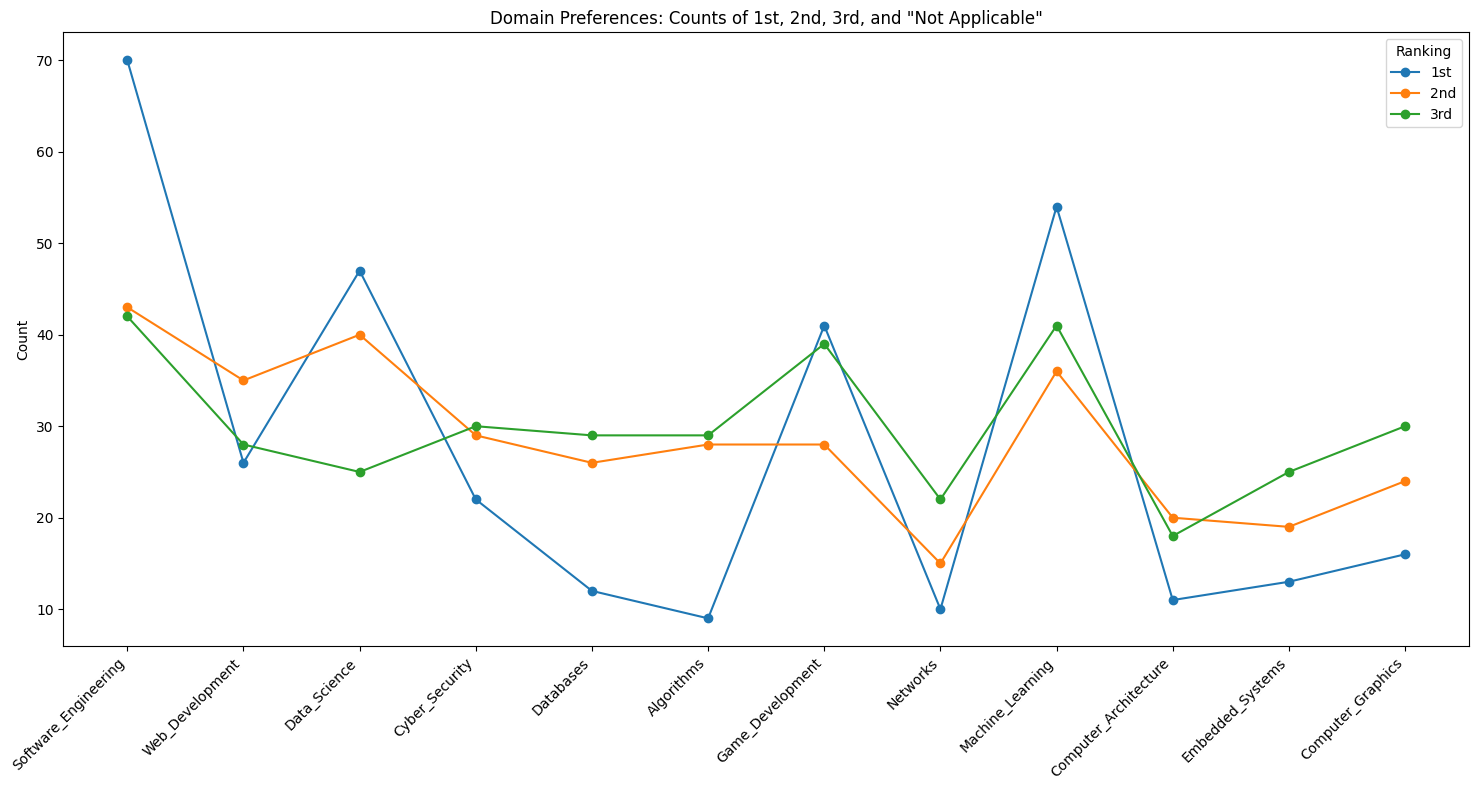

In [ ]:
phrases_SW = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_SW = full_df['Software_Engineering'].value_counts()
filtered_counts = phrase_counts_SW[phrase_counts_SW.index.isin(phrases_SW)]

phrases_WD = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_WD = full_df['Web_Development'].value_counts()
filtered_counts = phrase_counts_WD[phrase_counts_WD.index.isin(phrases_WD)]

phrases_DS = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_DS = full_df['Data_Science'].value_counts()
filtered_counts = phrase_counts_DS[phrase_counts_DS.index.isin(phrases_DS)]

phrases_CS = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_CS = full_df['Cyber_Security'].value_counts()
filtered_counts = phrase_counts_CS[phrase_counts_CS.index.isin(phrases_CS)]

phrases_DATABASES = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_DATABASES = full_df['Databases'].value_counts()
filtered_counts = phrase_counts_DATABASES[phrase_counts_DATABASES.index.isin(phrases_DATABASES)]

phrases_ALGORITHMS = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_ALGORITHMS = full_df['Algorithms'].value_counts()
filtered_counts = phrase_counts_ALGORITHMS[phrase_counts_ALGORITHMS.index.isin(phrases_ALGORITHMS)]

phrases_GD = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_GD = full_df['Game_Development'].value_counts()
filtered_counts = phrase_counts_GD[phrase_counts_GD.index.isin(phrases_GD)]

phrases_NETWORKS = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_NETWORKS = full_df['Networks'].value_counts()
filtered_counts = phrase_counts_NETWORKS[phrase_counts_NETWORKS.index.isin(phrases_NETWORKS)]

phrases_ML = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_ML = full_df['Machine_Learning'].value_counts()
filtered_counts = phrase_counts_ML[phrase_counts_ML.index.isin(phrases_ML)]

phrases_CA = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_CA = full_df['Computer_Architecture'].value_counts()
filtered_counts = phrase_counts_CA[phrase_counts_CA.index.isin(phrases_CA)]

phrases_ES = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_ES = full_df['Embedded_Systems'].value_counts()
filtered_counts = phrase_counts_ES[phrase_counts_ES.index.isin(phrases_ES)]

phrases_CG = ['1st', '2nd', '3rd', 'Not applicable']
phrase_counts_CG = full_df['Computer_Graphics'].value_counts()
filtered_counts = phrase_counts_CG[phrase_counts_CG.index.isin(phrases_CG)]

domain_columns = ['Software_Engineering', 'Web_Development', 'Data_Science', 'Cyber_Security',
                  'Databases', 'Algorithms', 'Game_Development', 'Networks', 'Machine_Learning',
                  'Computer_Architecture', 'Embedded_Systems', 'Computer_Graphics']
phrases = ['1st', '2nd', '3rd']
rank_mapping = {'1st': 1, '2nd': 2, '3rd': 3}

plt.figure(figsize=(15, 8))
x_coords = range(len(domain_columns))

for phrase in phrases:
    y_coords = []
    for col in domain_columns:
        counts = full_df[col].value_counts()
        y_coords.append(counts.get(phrase, 0))

    plt.plot(x_coords, y_coords, marker='o', label=phrase)

plt.xticks(x_coords, domain_columns, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Domain Preferences: Counts of 1st, 2nd, 3rd, and "Not Applicable"')
plt.legend(title="Ranking", loc="upper right")
plt.tight_layout()
plt.show()

###Observations:

From the above chart we observed that the most popular interests are Software Engineering, Machine Learning, and Data Science. In contrast, the least popular were Networks and Computer Architecture. It was interesting to see how first years showed little interest in Databases and Algorithms in comparison to 2nd and 3rd years. There were very evident topics of interest for this grade level, visibly Machine learning, Game development, Data science, and Software engineering.

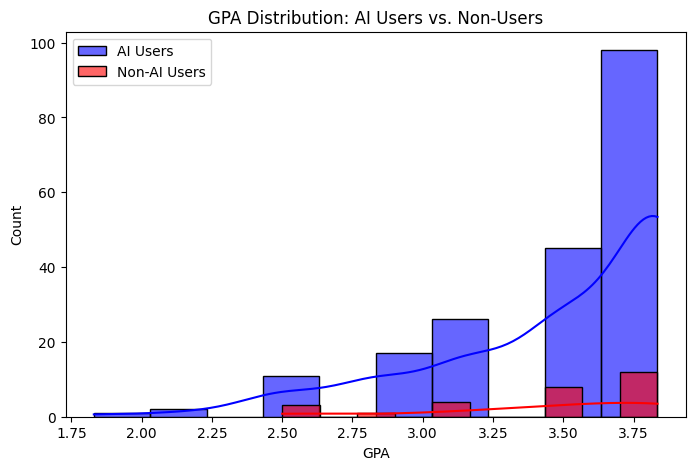

In [ ]:
a = survey_df.copy()

def convert_gpa_range(gpa):
    if pd.isna(gpa) or gpa.strip() == "" or gpa == "Prefer not to say":
        return np.nan

    if "–" in gpa:
        try:
            low, high = map(float, gpa.replace("–", "-").split(" - "))
            return (low + high) / 2
        except ValueError:
            return np.nan
    try:
        return float(gpa)
    except ValueError:
        return np.nan

a['GPA Numeric'] = a['GPA'].apply(convert_gpa_range)


plt.figure(figsize=(8,5))
sns.histplot(a[a['Uses AI Tools'] == 'Yes']['GPA Numeric'], bins=10, color='blue', label="AI Users", kde=True, alpha=0.6)
sns.histplot(a[a['Uses AI Tools'] == 'No']['GPA Numeric'], bins=10, color='red', label="Non-AI Users", kde=True, alpha=0.6)

plt.xlabel("GPA")
plt.ylabel("Count")
plt.title("GPA Distribution: AI Users vs. Non-Users")
plt.legend()
plt.show()


###Observations:
Before observing the graph we need to recognize that our data concerning students who do not use AI is limited. However, we can see a trend with AI Users that there is a large number of students with a GPA of 3.50 and above. On the other hand, with non-AI users we see a roughly even line in comparison to the heavily skewed left AI curve. This may indicate to some extent that students recieving help from AI tend to have a higher GPA.

<ipython-input-77-677c9eb0bad3>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(survey_df.pivot_table(index='Uses AI Tools', columns='Registered Units', aggfunc='size', fill_value=0),


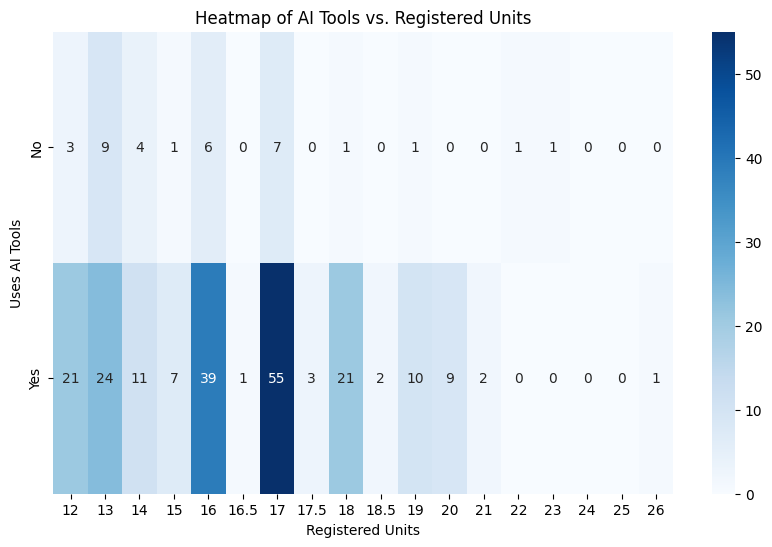

In [ ]:
units_order = ["12", "13", "14", "15", "16", "16.5", "17", "17.5", "18", "18.5", "19", "20", "21", "22", "23", "24", "25", "26"]

survey_df['Registered Units'] = pd.Categorical(survey_df['Registered Units'], categories=units_order, ordered=True)


plt.figure(figsize=(10, 6))

sns.heatmap(survey_df.pivot_table(index='Uses AI Tools', columns='Registered Units', aggfunc='size', fill_value=0),
            annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of AI Tools vs. Registered Units')
plt.xlabel('Registered Units')
plt.ylabel('Uses AI Tools')
plt.show()



### Observation

Of the 34 students who do not use AI tools, the largest group of them reported being registered for 13 units this quarter. Of the 206 students who do use AI tools, the largest group reported being registered for 17 units this quarter. This may suggest that students who register for more units are more likely to use AI, possibly due to managing higher academic workload.

'0 - 5 hours' occurred 140 times
'6 - 10 hours' occurred 56 times
'11 - 15 hours' occurred 27 times
'20+ hours' occurred 12 times
'16 - 20 hours' occurred 9 times


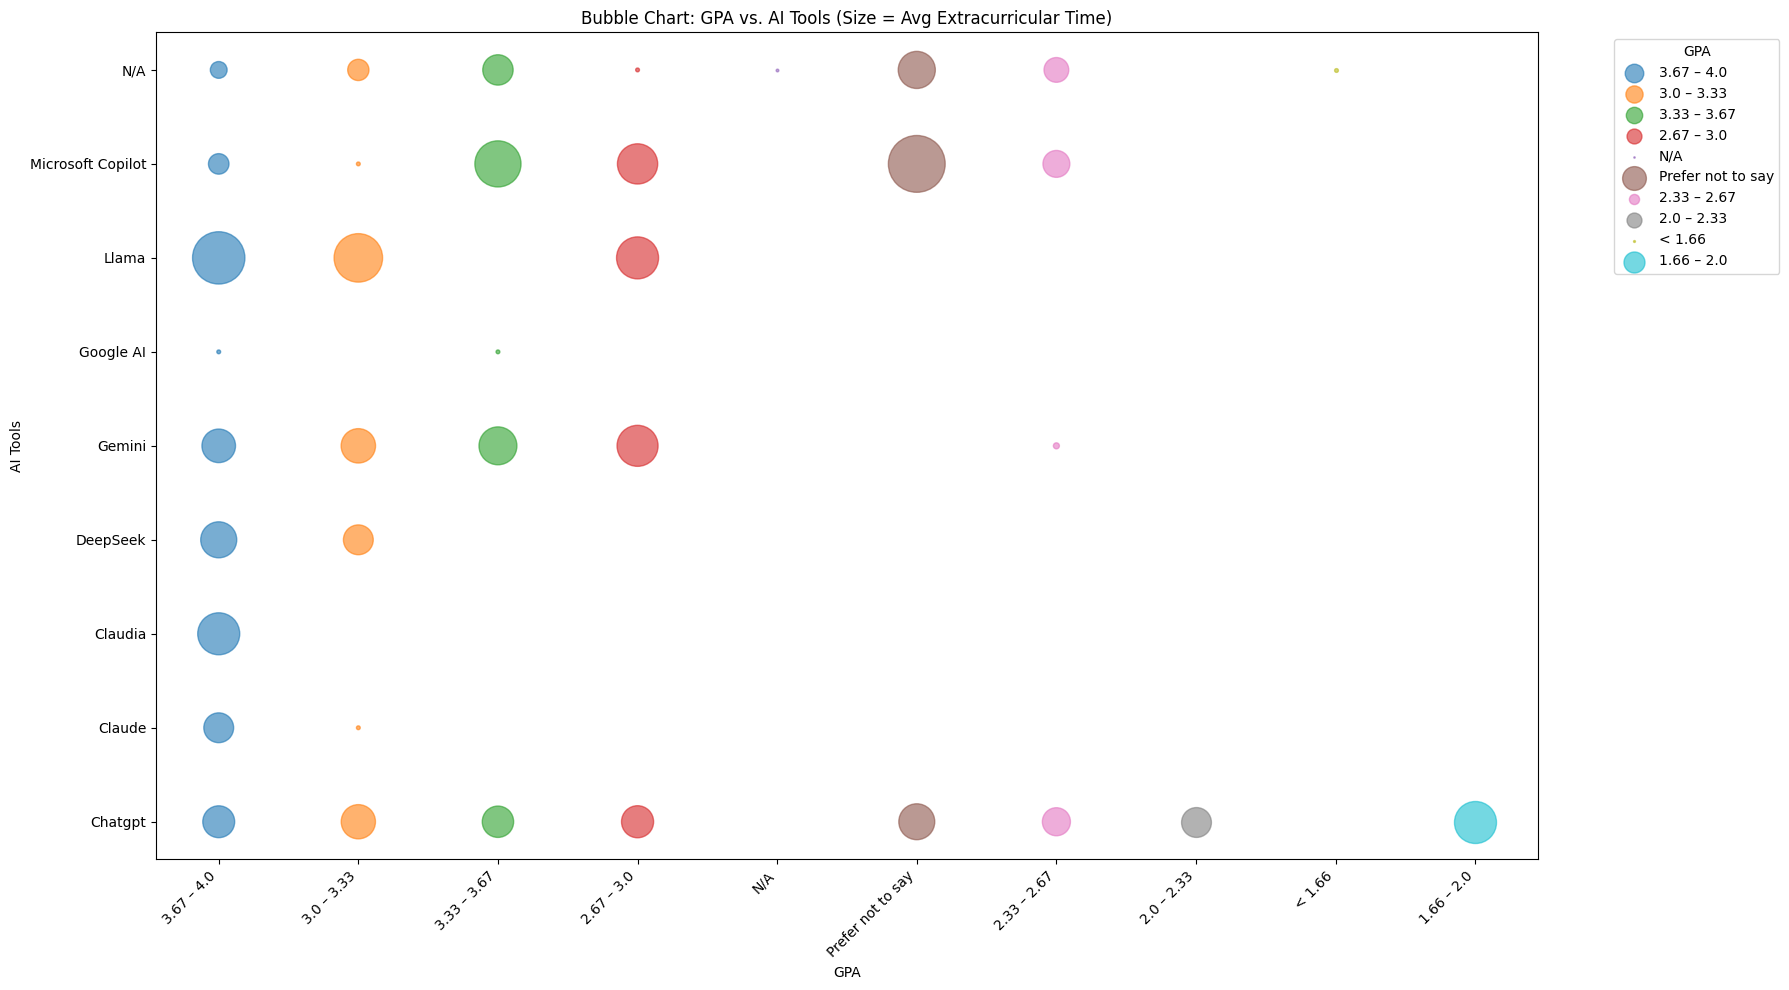

In [ ]:
def clean_ai_tools(tools):
    if isinstance(tools, str):
        tools_list = [tool.strip().title() for tool in tools.split(', ')]

        standard_tools = {
            "Google": "Google AI",
            "Deepseek": "DeepSeek"
        }

        cleaned_tools = set()
        for tool in tools_list:
            for key in standard_tools:
                if key.lower() in tool.lower():
                    cleaned_tools.add(standard_tools[key])
                    break
            else:
                cleaned_tools.add(tool)

        if not cleaned_tools or cleaned_tools == {"None"} or cleaned_tools == {"N/A"} or "I Do Not Use Ai Tools" in cleaned_tools:
            return "N/A"

        return ", ".join(sorted(cleaned_tools))

    return "N/A"


mini_project = survey_df.copy()

phrases_EXTRA = ['0 - 5 hours', '6 - 10 hours', '11 - 15 hours', '16 - 20 hours', '20+ hours']
phrase_counts_EXTRA = mini_project['Time Spent on Extracurricular Activities'].value_counts()
filtered_counts = phrase_counts_EXTRA[phrase_counts_EXTRA.index.isin(phrases_EXTRA)]
for phrase, count in filtered_counts.items():
     print(f"'{phrase}' occurred {count} times")


mini_project['AI Tools'] = mini_project['AI Tools'].fillna("N/A").apply(clean_ai_tools)

mini_project['GPA'] = mini_project['GPA'].replace(["", " ", None, np.nan, "None", "N/A"], "N/A")

mini_project['AI Tools'] = mini_project['AI Tools'].replace(["", " ", None, np.nan, "None", "N/A", "I Do Not Use Ai Tools"], "N/A")

gpa = mini_project['GPA'].unique()
ai_tools = sorted(set(tool for tools in mini_project['AI Tools'] for tool in tools.split(', ')))

bubble_data = {standing: {tool: {"total_time": 0, "count": 0} for tool in ai_tools} for standing in gpa}

def extract_numeric_time(time_str):
    if isinstance(time_str, str):
        num = ''.join(filter(str.isdigit, time_str))
        return int(num) if num else 0
    return 0

for _, row in mini_project.iterrows():
    standing = row['GPA']
    tools = row['AI Tools']
    time_spent = extract_numeric_time(row['Time Spent on Extracurricular Activities'])

    if isinstance(tools, str):
        tools_list = tools.split(', ')
        for tool in tools_list:
            if tool in ai_tools:
                bubble_data[standing][tool]["total_time"] += time_spent
                bubble_data[standing][tool]["count"] += 1

bubble_sizes = {standing: {tool: (bubble_data[standing][tool]["total_time"] / bubble_data[standing][tool]["count"])
                           if bubble_data[standing][tool]["count"] > 0 else 0
                           for tool in ai_tools} for standing in gpa}


plt.figure(figsize=(18, 10))

for i, standing in enumerate(gpa):
    x_coords, y_coords, sizes = [], [], []

    for j, tool in enumerate(ai_tools):
        avg_time = bubble_sizes[standing][tool]
        if avg_time > 0:
            x_coords.append(i)
            y_coords.append(j)
            sizes.append(avg_time)

    plt.scatter(x_coords, y_coords, s=np.array(sizes) * 1.5, label=standing, alpha=0.6)

plt.xticks(range(len(gpa)), [label if label else "N/A" for label in gpa], rotation=45, ha="right")
plt.yticks(range(len(ai_tools)), ai_tools)

plt.xlabel('GPA')
plt.ylabel('AI Tools')
plt.title('Bubble Chart: GPA vs. AI Tools (Size = Avg Extracurricular Time)')

plt.legend(title="GPA", bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.5)

plt.tight_layout()
plt.show()

###Observations:
From the chart we can see that diversity in choice of AI tools increases as students' GPA increases. This may suggest that leveraging multiple AI tools could be positively correlated with a student's academic performance, connecting to Hypothesis #3.


# Hypothesis Description
1. The use of AI tools has a direct correlation to stress, students may either feel more supported or more dependent on AI, impacting their stress levels.
2. Higher class standing is associated with a higher likelihood of AI usage.
3.The use of AI tools has a direct impact on student involvement and academic success.

To test our three hypotheses, we are using the Pearson Correlation Coefficient (PCC) test and the Chi-Squared test.

The Pearson Correlation Coefficient measures the strength and direction of the linear relationship between two variables. The PCC is calculated as the ratio of the covariance of the two variables to the product of their standard deviations. To use the PCC, we plotted two variables on scatter plots and created a line of best fit to determine correlation.

The Chi-Squared test is used to determine if there is an association between categorical variables. It works by comparing observed counts in a contingency table with expected counts in a table.

#Hypothesis Testing

### Hypothesis #1: Chi-Squared & Pearson Correlation Coefficient
Students may either feel more supported or more dependent on AI, impacting their stress levels. The use of AI tools has a direct correlation to stress, students may either feel more supported or more dependent on AI, impacting their stress levels.


In [ ]:
#Chi-Squared Test
from scipy.stats import chi2_contingency


#variable1 = 'Uses AI Tools'
#variable2 = 'Stress Take-home work'

contingency_table = pd.crosstab(df['Uses AI Tools'], df['Stress Take-home work'])
contingency_table2 = pd.crosstab(df['Uses AI Tools'], df['Stress Tests'])

observed_values = contingency_table.values
observed_values2 = contingency_table2.values

chi2_stat, p_value, dof, expected = chi2_contingency(observed_values)
chi2_stat2, p_value2, dof2, expected2 = chi2_contingency(observed_values2)

print(f"Chi-Square Statistic for AI Tools vs. Stress for Take-home work: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

print(f"Chi-Square Statistic for AI Tools vs. Stress on Tests: {chi2_stat2}")
print(f"P-value: {p_value2}")
print(f"Degrees of Freedom: {dof2}")


Chi-Square Statistic for AI Tools vs. Stress for Take-home work: 18.180314493133938
P-value: 0.0011378704066503289
Degrees of Freedom: 4
Chi-Square Statistic for AI Tools vs. Stress on Tests: 5.37276656513765
P-value: 0.2511418285640671
Degrees of Freedom: 4


### **Explanation**

Using a standard significance of 0.05 and DoF of 4, the Chi-Square Statistic of 19.9 is higher than the table's critical value of 9.488 meaning we reject the null hypothesis. There is strong evidence which shows there is a correlation between AI usage and stress levels on take-home work.

However, the Chi-Squared test regarding stress on tests is 5.37, far less than the critical value of 9.488. This means that we fail to reject the null and we do not have evidence to show there is an association between AI usage and Stress levels on tests.

In [ ]:
#Pearson Correlation Test

def conv_Stress(stress):
  mapping = {
      "Always stressed": 5,
      "Often stressed": 4,
      "Sometimes stressed": 3,
      "Rarely stressed": 2,
      "Not at all stressed": 1,
  }
  return mapping.get(stress, None)


def ai_use_binary(use):
  if isinstance(use, str):
    normal = use.lower().strip()
    return 0 if any(keyword in normal for keyword in ["none"]) else 1
  return 0

converted_df = survey_df.copy()
converted_df = converted_df.dropna()

converted_df["Stress Homework Ordinal"] = converted_df["Stress Take-home work"].apply(conv_Stress)
hmk_stress = converted_df["Stress Homework Ordinal"]

converted_df["Stress Test Ordinal"] = converted_df["Stress Tests"].apply(conv_Stress)
test_stress = converted_df["Stress Test Ordinal"]

converted_df['AI Use Binary'] = converted_df['AI Tools'].apply(ai_use_binary)
ai_uses = converted_df['AI Use Binary']

correlation_co_homework, p_value_homewrok = pearsonr(ai_uses, hmk_stress)
print("AI Use vs. Stress on Take-home work")
print(f"Pearson Correlation Coefficient: {correlation_co_homework}")
print(f"p_value: {p_value_homewrok}")

correlation_co_test, p_value_test = pearsonr(ai_uses, test_stress)
print("\nAI Use vs. Stress on Tests:")
print(f"Pearson Correlation Coefficient: {correlation_co_test}")
print(f"p_value: {p_value_test}")

AI Use vs. Stress on Take-home work
Pearson Correlation Coefficient: -0.04205441543801535
p_value: 0.517616894715313

AI Use vs. Stress on Tests:
Pearson Correlation Coefficient: 0.0725204876013198
p_value: 0.2641086212275394


### **Explanation**
The results of AI Use vs. Stress on Take-Home Work show a slight negative correlation of about -0.04, meaning there is a very weak relationship. The p-value of .51 is higher than the threshold meaning there is insufficient evidence to reject the null hypothesis. AI Use vs. Stress on Tests showed a higher correlation of .07, but still weak overall. The p-value was lower at about .26, while closer to the threshold it is still not enough evidence to reject the null hypothesis. Overall, when comparing AI use against stress on take-home work and tests, there is not enough evidence to claim a relationship between them.

### Hypothesis #2: Chi-Squared & Pearson Correlation Coefficient
Higher class standing is associated with a higher likelihood of encountering AI-related challenges.

In [ ]:
#Chi-Squared Test

class_standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Year 5', 'Graduate']
survey_df['Class Standing'] = pd.Categorical(survey_df['Class Standing'], categories=class_standing_order, ordered=True)

filtered_df = df[~df['AI Challenges'].isin(unwanted_responses)]

contingency_table = pd.crosstab(survey_df['Class Standing'], filtered_df['AI Challenges'])

observed_values = contingency_table.values

chi2_stat, p_value, dof, expected = chi2_contingency(observed_values)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 19.903584277791175
P-value: 0.018516833043104974
Degrees of Freedom: 9


### **Explanation**

Choosing a standard significance of 0.05 and DoF of 9, the Chi-Square Statistic of 19.9 is higher than the table value of 16.92, we can reject the null hypothesis. We have enough statistical evidence to show that there is a correlation between the amount of challenges respondents encountered with AI usage and class standing.

In [ ]:
#Pearson Correlation Test
def conv_standing(standing):
  mapping = {
      "Year 5": 5,
      "Senior": 4,
      "Junior": 3,
      "Sophomore": 2,
      "Freshman": 1,
  }
  return mapping.get(standing, None)

def ai_use_binary(use):
  if isinstance(use, str):
    normal = use.lower().strip()
    return 0 if "none" in normal else 1
  return None

converted_df = survey_df.copy()

converted_df["Standing Ordinal"] = converted_df["Class Standing"].apply(conv_standing)
converted_df['AI Use Binary'] = converted_df['AI Tools'].apply(ai_use_binary)

converted_df = converted_df.dropna(subset=["Standing Ordinal", "AI Use Binary"])

standing = converted_df["Standing Ordinal"]
ai_uses = converted_df['AI Use Binary']

correlation_co_standing, p_value_standing = pearsonr(ai_uses, standing)
print("\nClass Standing vs. AI Use:")
print(f"Pearson Correlation Coefficient: {correlation_co_standing}")
print(f"p_value: {p_value_standing}")


Class Standing vs. AI Use:
Pearson Correlation Coefficient: 0.10652511837469297
p_value: 0.09898093930955063


### **Explanation**
For this test the results show a weak correlation with a value of .1, showing a slight increase in AI usage as class year increases. However, the p-value of .098 is above the threshold of .05 meaning there is insufficient evidence to reject the null hypothesis. Therefore we cannot conclude a significant relationship between class standing and AI use.

### Hypothesis #3: Chi-Squared & Pearson Correlation Coefficient
There is a direct correlation between usage of AI tools and a student's academic performance (GPA).

In [ ]:
#Pearson Correlation Test
def convert_gpa_range(gpa):
    if pd.isna(gpa) or gpa.strip() == "" or gpa == "Prefer not to say":
        return np.nan

    if "–" in gpa:
        try:
            low, high = map(float, gpa.replace("–", "-").split(" - "))
            return (low + high) / 2
        except ValueError:
            return np.nan

    try:
        return float(gpa)
    except ValueError:
        return np.nan

def ai_use_binary(use):
  if isinstance(use, str):
    normal = use.lower().strip()
    return 0 if any(keyword in normal for keyword in ["none"]) else 1
  return 0

converted_df = survey_df.copy()
converted_df['GPA Numeric'] = converted_df['GPA'].apply(convert_gpa_range)
converted_df['AI Use Binary'] = converted_df['AI Tools'].apply(ai_use_binary)
converted_df = converted_df.dropna(subset=["GPA Numeric", "AI Use Binary"])

gpas = converted_df['GPA Numeric']
ai_uses = converted_df['AI Use Binary']

correlation_co, p_value = pearsonr(ai_uses, gpas)
print("\nAI Use vs. GPA:")
print(f"Pearson Correlation Coefficient: {correlation_co}")
print(f"p_value: {p_value}")


AI Use vs. GPA:
Pearson Correlation Coefficient: 0.016143122289817492
p_value: 0.808445568022811


### **Explanation**
The results of AI Use vs. GPA show a correlation coefficient of .016 exhibiting an extremely weak positive relationship. The p-value of .81 is much higher than the threshold meaning there is not enough evidence to reject the null hypothesis and establish a meaningful relationship between the two variables.

In [ ]:
#Chi-Squared Test

converted_df['GPA_Category'] = pd.cut(converted_df['GPA Numeric'], bins=[0, 2.5, 3.5, 4.0], labels=['Low', 'Medium', 'High'])

contingency_table = pd.crosstab(converted_df['AI Use Binary'], converted_df['GPA_Category'])

observed_values = contingency_table.values
chi2_stat, p_value, dof, expected = chi2_contingency(observed_values)

print("\nChi-squared test for AI Use and GPA:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-squared test for AI Use and GPA:
Chi-Square Statistic: 0.815207863249146
P-value: 0.665242308091188
Degrees of Freedom: 2


### **Explanation**

With a significance of 0.05 and DoF of 2, the Chi-Square Statistic of 0.815 is lower than the table value of 5.99, this indicates that is not enough evidence to reject the null hypothesis. Accordingly, we fail to reject the null hypothesis and cannot say there is a correlation between the usage of AI tools and GPA.

### **Conclusion**

In this study, we set out to investigate how AI usage by students affects their academic performance, stress levels, and how challenges they encounter differs by class standing. We believe that our analysis is insightful and can be helpful to students who would like to use or are currently using AI tools.

After conducting hypothesis testing with the Pearson Correlation Coefficient and Chi-Squared tests, these were our findings:

1. AI Usage and Stress Levels (Hypothesis #1)

  The results of our Chi-Squared test for Hypothesis #1 shows that there is an association between AI usage and stress levels on homework assignments. But we could not find an association between AI usage and stress levels on tests. Unfortunately, both PCC tests failed to support our hypothesis, yielding low correlation coefficients. We cannot definitively state that there is a correlation between AI-usage and general stress levels but our tests point towards there being an association between stress levels while working on homework assignments and students' AI usage.

2. Class Standing and AI-Related Challenges (Hypothesis #2)

  Testing for Hypothesis #2 yielded more promising results. Our Chi-Squared test was once again able to reject the null and suggest that there is an association between higher class standing and higher levels of AI-related problems. Our PCC test found a weak correlation (0.1) but the p-value was not low enough to accept the alternate hypothesis. But we will still maintain a possible association between higher class standing and challenges encountered using AI.

3. AI Usage and Academic Performance (Hypothesis #3)

  Our PCC test for Hypothesis #3 generated a coefficient of 0.16 and a high p-value. We were unable to reject the null. The Chi-Squared resulted in a Chi-Squared Value of 0.815, also failing to reject the null hypothesis. These results indicate that there is no tangible relationship between usage of AI tools and a student's GPA.



Our findings were a mixed bag— while we could not definitively confirm any of our hypotheses, we still discovered some supporting evidence. We found the most possible supporting evidence for Hypothesis #2 (class standing and AI-related challenges), since the Chi-Squared test passed with flying colors. Although our PCC test failed, it only did so by a minor margin.

Additionally, part of Hypothesis #1, being that stress levels on homework is associated with AI usage, showed potential because of the Chi-Squared test's strong passing results.

Despite our results not being what we had hoped, we believe further research and testing with an expanded dataset can yield more definitive conclusions. Ultimately, our study highlighted and displayed that AI tools actively impact numerous aspects of students' academic experience. Going forward, it is important that the academic community continues to fund and conduct studies such as ours so we can better understand AI and its effects.



### **Acknowledgements**
Describe each group member’s contribution:

Lance: Created and structured final collab document, data description, drafting objectives, drafting hypothesis description, hypothesis formatting, correlation coefficient & analysis.

Kainoa: Chi-Squared tests and explanations, hypothesis drafting, and graph/data explainations.

Kimberly: Data Cleaning, Creating visualizations, Drafting Hypothesis, Making sure code is coherent, Observations for visualizations.

Jasper: Data Cleaning, creating visualizations, and general code assistance.

Ria: observations for visualizations, making sure visuals line up with hypotheses, and drafted hypotheses.

Maanas: I worked on observations/analysis for the visualizations, creating and analyzing the Chi-Squared tests, cleaning and finalizing the document, and writing the conclusion.
